In [1]:
from trainUMAP import *
sylla_list = np.load('../4-Results/bengal/0923/pre/sylla_list.npy')
dur=sylla_list[:,2]

In [27]:
def hist_duration(lenth, labels, color, g_list, xmax=3000, save=None):
    a = 1
    for g in g_list:
        lenth_g = lenth[np.array(labels)==g]
        plt.hist(lenth_g, color=color[g], bins=50, range=(1000,xmax), alpha=0.76, linewidth=0.2, edgecolor='black')
    
    if save!=None:
        plt.savefig(save)
    plt.show()


## UMAP only

In [2]:
x = Projection('../4-Results/bengal/0923/umap/x_flatten.npy')

lat shape:  (54198, 8192) path:  ../4-Results/bengal/0923/umap//


(54198, 2)


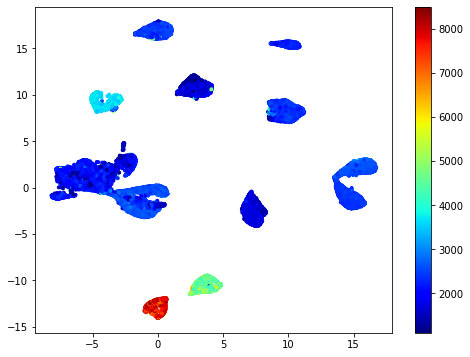

In [3]:
x.umap = x.umap_embedding()
plot_project(x.umap, dur)

(54198, 2)


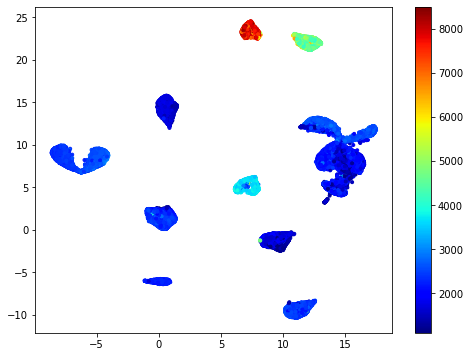

In [5]:
x.umap = x.umap_embedding(nei=100)
plot_project(x.umap, dur)

## VAE-z=10

In [6]:
z10 = Projection('../4-Results/bengal/0923/lat10/x_lat.npy')

lat shape:  (54198, 10) path:  ../4-Results/bengal/0923/lat10//


(54198, 2)


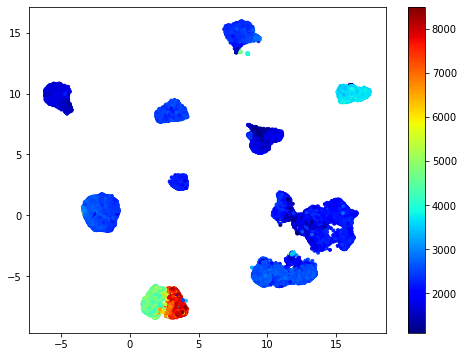

In [7]:
z10.umap = z10.umap_embedding()
plot_project(z10.umap, dur)

(54198, 2)


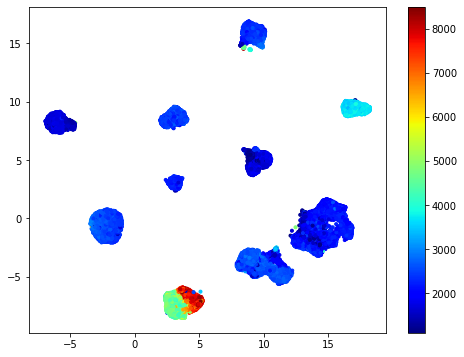

In [8]:
z10.umap = z10.umap_embedding(nei=100)
plot_project(z10.umap, dur)

(54198, 2)


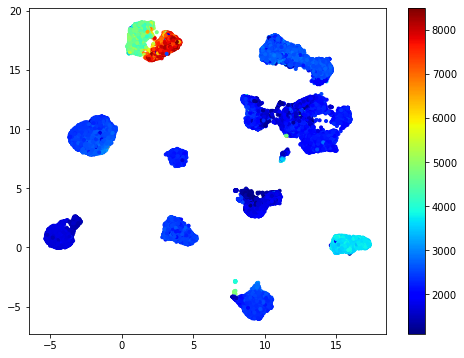

In [9]:
z10.umap = z10.umap_embedding(nei=20)
plot_project(z10.umap, dur)

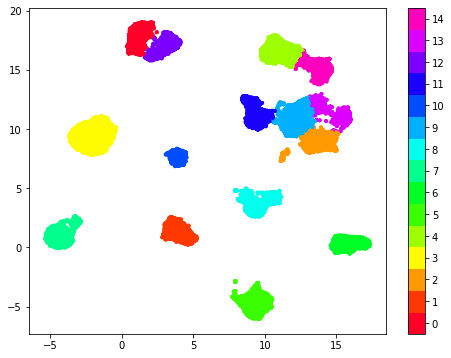

In [23]:
labels = z10.get_kmeans_labels(15)
plot_cluster(z10.umap, z10.labels)

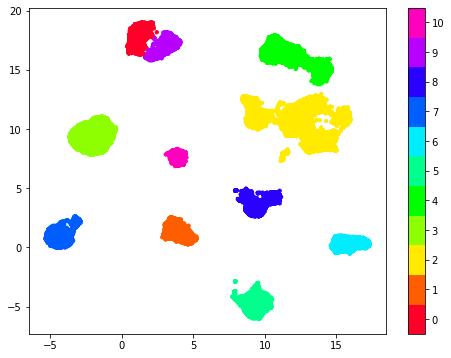

In [25]:
z10.labels = [4 if i==14 else i for i in labels]
z10.labels = [2 if i==11 or i==9 or i==13 else i for i in z10.labels]
z10.labels = [9 if i==12 else i for i in z10.labels]

plot_cluster(z10.umap, z10.labels)

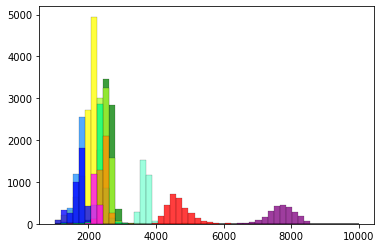

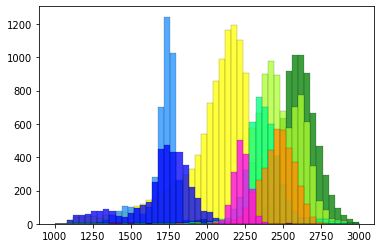

In [32]:
g_list = [2,4,3,7,8,5,6,1,9,10,0]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'green', 'springgreen','aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(dur, labels, color, g_list, xmax=10000)
hist_duration(dur, labels, color, g_list, xmax=3000)

## VAE_z100

In [10]:
z100 = Projection('../4-Results/bengal/0923/lat100/x_lat.npy')

lat shape:  (54198, 100) path:  ../4-Results/bengal/0923/lat100//


(54198, 2)


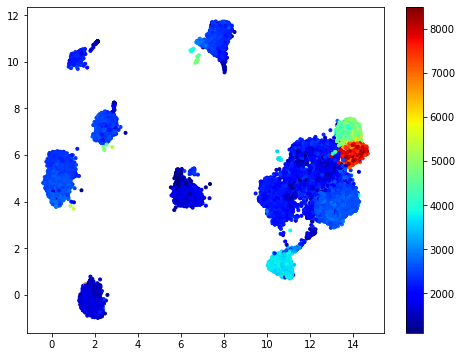

In [11]:
z100.umap = z100.umap_embedding()
plot_project(z100.umap, dur)

(54198, 2)


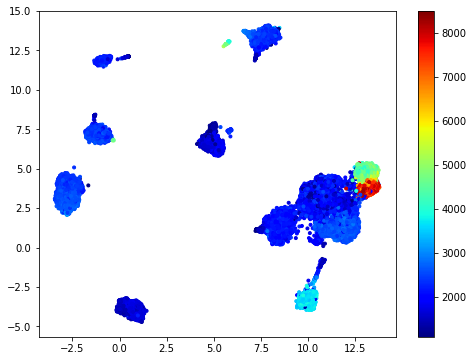

In [12]:
z100.umap = z100.umap_embedding(nei=20)
plot_project(z100.umap, dur)

## VAE_z50

In [14]:
z50 = Projection('../4-Results/bengal/0923/lat50/x_lat.npy')

lat shape:  (54198, 50) path:  ../4-Results/bengal/0923/lat50//


(54198, 2)


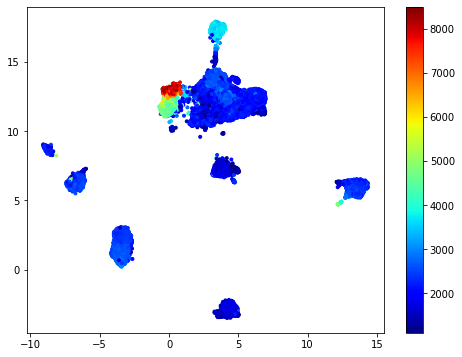

In [15]:
z50.umap = z50.umap_embedding()
plot_project(z50.umap, dur)

(54198, 2)


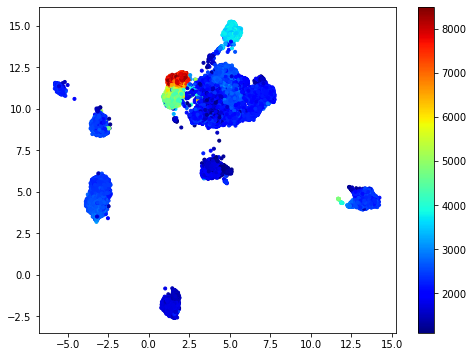

In [16]:
z50.umap = z50.umap_embedding(nei=100)
plot_project(z50.umap, dur)

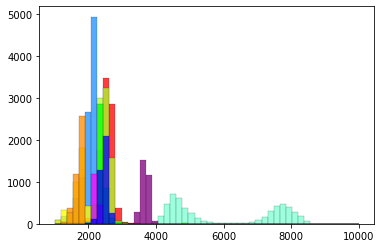

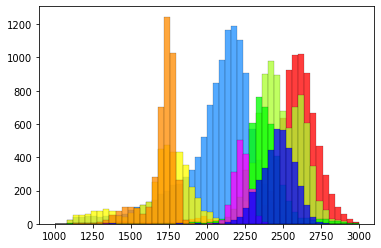

In [60]:
g_list = [6,0,5,2,3,4,9,1,7,8]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'lime', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(sylla_list[:,2], z10_labels, color, g_list, xmax=10000, save=save_path+'/plot_glenth')
hist_duration(sylla_list[:,2], z10_labels, color, g_list, xmax=3000, save = save_path+'/plot_glenth_3000')

In [31]:
x_umap = umap_embedding(x_flatten)

(54198, 2)


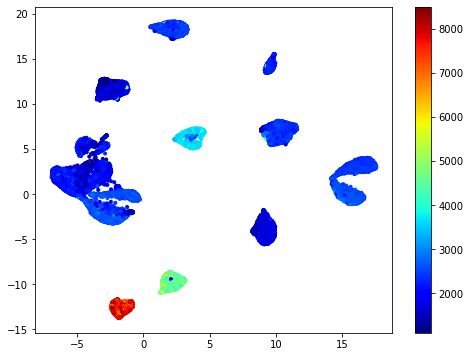

In [65]:
plot_project(x_umap, sylla_list[:,2], save=save_path+'../umap/plot_projection_dur')

In [48]:
kmeans_labels = get_kmeans_labels(x_umap, 12)

In [49]:
x_labels = [3 if i==8 else i for i in kmeans_labels]
x_labels = [8 if i==11 else i for i in x_labels]
#custom_labels = [9 if i==4 else i for i in custom_labels]

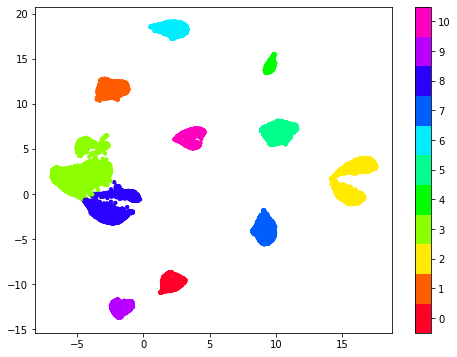

In [66]:
plot_cluster(x_umap, x_labels, save=save_path+'../umap/plot_projection_group')

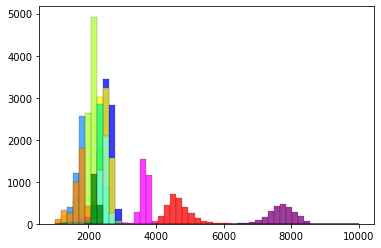

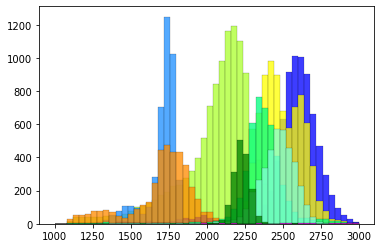

In [67]:
g_list = [3,8,2,7,1,5,6,4,9,10,0]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'green', 'springgreen','aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(sylla_list[:,2], x_labels, color, g_list, xmax=10000, save=save_path+'../umap/plot_lenth')
hist_duration(sylla_list[:,2], x_labels, color, g_list, xmax=3000, save=save_path+'../umap/plot_lenth_3000')

In [59]:
g_list = [5,2,3,4,0,9,6,1]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'lime', 'springgreen', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']



In [96]:
np.save(save_path+'/x_umap', x_umap)
np.save(save_path+'/custom_label', np.array(custom_labels))